## <span style="color:green">Data Mining Home Work 2 </span>
#### <span style="color:purple"> Syed Hassan Raza, Yuying Chen, Brittany Thum, Xinpei Zhao </span>

#### Note:<br>
## <span style="color:red">This is not the main work file! </span>
####  <span style="color:red">  Knime Workflow is our main work file</span>

#### We used Python to:

#### 1) Calculate optimal K value for both our KNN and K Means clustering models.
#### 2) Do some EDA and Visualization 

    

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.cluster import KMeans

In [29]:
data = pd.read_csv("/Users/hanyhamdani/Desktop/Coursework/Mod B Fall/DataMining/Hw2/DATA_CLEAN.csv")
data.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.000000,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26.0,-1,2,-1,-1,...,3272.0,3455.0,3261.0,0.0,1000.000000,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34.0,-1,-1,-1,-1,...,14331.0,14948.0,15549.0,1518.0,1500.000000,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37.0,-1,-1,-1,-1,...,28314.0,28959.0,29547.0,2000.0,2019.000000,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57.0,-1,-1,-1,-1,...,20940.0,19146.0,19131.0,2000.0,2641.679099,10000.0,9000.0,689.0,679.0,0


In [30]:
data.rename(columns = {'default payment next month': 'default'}, inplace = True)            

## EDA

In [31]:
data.default.value_counts()
data.default.value_counts()[1]/data.default.value_counts()[0] *100

28.722386502000347

In [32]:
data.default.value_counts()

0    22996
1     6605
Name: default, dtype: int64

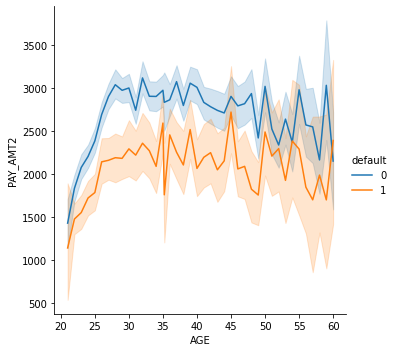

In [33]:
sns.relplot(x = 'AGE', y = 'PAY_AMT2',  hue = 'default',kind ='line'  ,data = data)

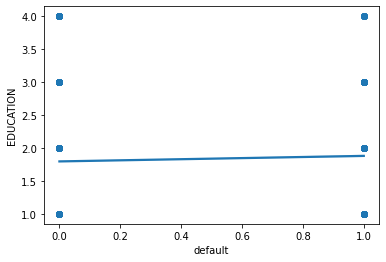

In [34]:
sns.regplot(y = data.EDUCATION, x = data.default)

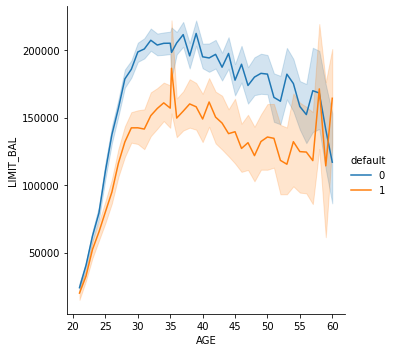

In [35]:
sns.relplot(x = 'AGE' ,y = 'LIMIT_BAL', hue = 'default', kind ='line',data = data)

/Users/hanyhamdani/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


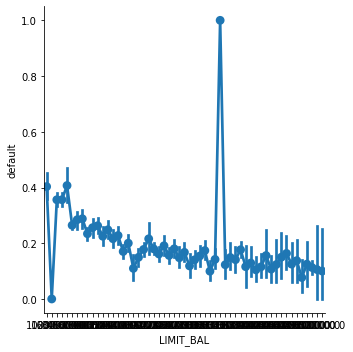

In [36]:
sns.factorplot(x="LIMIT_BAL", y='default', data=data)

## Visualizations

[Text(0, 0, 'Male'), Text(0, 0, 'Female')]

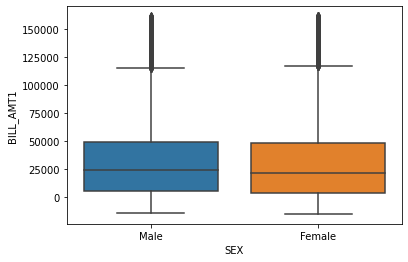

In [37]:
sns.boxplot(x = "SEX", y ="BILL_AMT1", data = data).set_xticklabels(["Male","Female"])

In [38]:
#sns.countplot(x = "BILL_AMT1", data= data)

In [39]:
data.MARRIAGE.value_counts()

2    15806
1    13477
3      318
Name: MARRIAGE, dtype: int64

In [40]:
data.groupby("SEX")['default'].mean().sort_values(ascending = False)

SEX
1    0.243572
2    0.209689
Name: default, dtype: float64

[Text(0, 0, 'Male'), Text(0, 0, 'Female')]

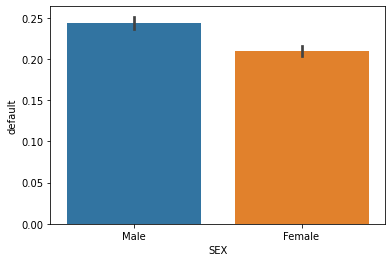

In [41]:
sns.barplot(x = 'SEX', y = 'default', data= data).set_xticklabels(["Male","Female"])

In [42]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [43]:
data.BILL_AMT1.describe()

count     29601.000000
mean      33817.500165
std       37400.305828
min      -15308.000000
25%        3540.000000
50%       22271.000000
75%       48578.000000
max      161248.000000
Name: BILL_AMT1, dtype: float64

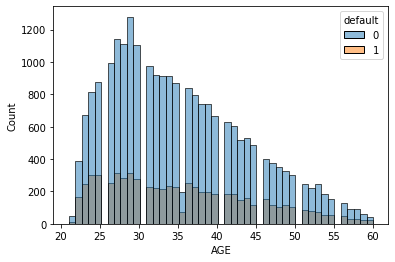

In [44]:
sns.histplot(x = 'AGE', hue = 'default', data = data)

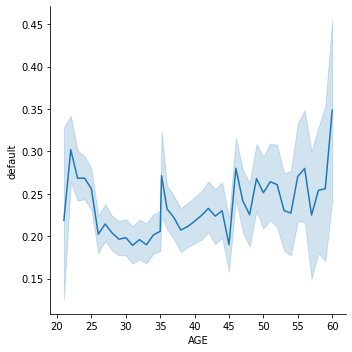

In [45]:
sns.relplot(x = 'AGE', y = 'default', data = data , kind = 'line')

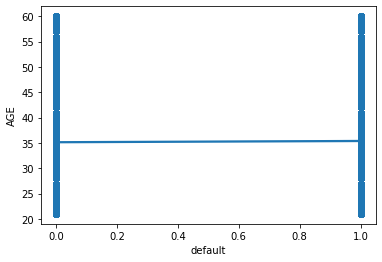

In [46]:
sns.regplot(y = 'AGE', x = 'default', data = data )

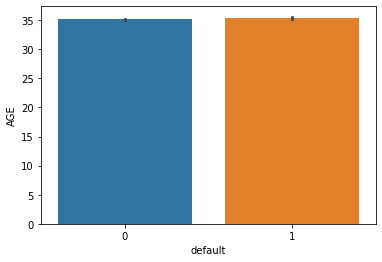

In [47]:
ax = sns.barplot(y = 'AGE', x = 'default', data = data)

In [48]:
data.groupby('AGE')['default'].count()

AGE
21.000000      64
22.000000     553
23.000000     917
24.000000    1117
25.000000    1176
26.000000    1245
27.000000    1455
28.000000    1397
29.000000    1593
30.000000    1382
31.000000    1205
32.000000    1143
33.000000    1127
34.000000    1147
35.000000    1098
35.198111     269
36.000000    1094
37.000000    1023
38.000000     936
39.000000     941
40.000000     850
41.000000     811
42.000000     786
43.000000     666
44.000000     691
45.000000     600
46.000000     557
47.000000     492
48.000000     457
49.000000     444
50.000000     402
51.000000     333
52.000000     299
53.000000     317
54.000000     242
55.000000     207
56.000000     175
57.000000     120
58.000000     122
59.000000      82
60.000000      66
Name: default, dtype: int64

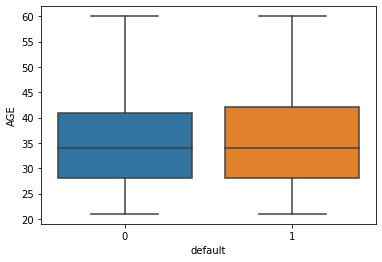

In [49]:
sns.boxplot(x = 'default', y ="AGE", data = data)

## Finding Best k value
####   Q3.4 Use k-means clustering to segment the customers on AGE. What value of k did you decide to use and why?

In [50]:
y = data['default']
X = data.drop('default', axis = 1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

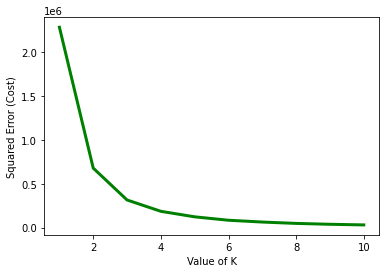

In [52]:
age = data['AGE'].to_numpy().reshape(-1, 1)

cost =[]
for i in range(1, 11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(age)
     
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)    
 
# plot the cost against K values
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot
 
# the point of the elbow is the
# most optimal value for choosing k

In [ ]:

error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)